<a href="https://colab.research.google.com/github/Nicolaser1102/Introduccion-modelos-basados-en-arboles/blob/main/Tareas_Week6/Ejercicio_de_divisi%C3%B3n_entrenar_probar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODING DOJO 
## Fecha creación: 9/2/2022
## Fecha de actualización: 10/2/2022
## Esteban Simbaña

#Ejercicio de división entrenar probar







In [332]:
#Montamos el drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [333]:
#Importamos librerías para poder manejar mejor el df
import pandas as pd
import numpy as np

In [334]:
nombrearchivo = '/content/drive/MyDrive/Coding Dojo/Códigos/Track 2 /Week 1 - Track2/Deberes /Ejercicio KNN/abalone.data'

df = pd.read_csv(nombrearchivo)
df.head() #Mostramos df

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


#Limpieza de datos 

In [335]:
#observamos que no hay datos faltantes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   0.455   4176 non-null   float64
 2   0.365   4176 non-null   float64
 3   0.095   4176 non-null   float64
 4   0.514   4176 non-null   float64
 5   0.2245  4176 non-null   float64
 6   0.101   4176 non-null   float64
 7   0.15    4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [336]:
#nuestra base de datos está completa
df.isnull().sum() 

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64

Ahora, se observa que los nombres de las columnas son en realidad parte de otra fila de datos

In [337]:
df.columns.values[0:9]

array(['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15',
       '15'], dtype=object)

In [338]:
#Creación de un diccionario para anexarlo a nuestra df 
extra_fila = {'M':'M','0.455':0.455,'0.365':0.365,'0.095':0.095,'0.514':0.514,'0.2245':0.2245, '0.101': 0.101,'0.15':0.15,'15':15}
#Se anexa a la df / Nota: no olvidar el 'ignore_index = True' o arrojará error
df = df.append(extra_fila,ignore_index = True)
df.tail() 

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4175,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12
4176,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15


Efectivamente, nuestra última fila ya se encuentra en la df

Sin título3.png

In [339]:
#vemos la info de la df de nuevo para ver si no se cambiaron los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4177 non-null   object 
 1   0.455   4177 non-null   float64
 2   0.365   4177 non-null   float64
 3   0.095   4177 non-null   float64
 4   0.514   4177 non-null   float64
 5   0.2245  4177 non-null   float64
 6   0.101   4177 non-null   float64
 7   0.15    4177 non-null   float64
 8   15      4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Todo está correcto con respecto a los valores.

Ahora, se cambian los valores de las columnas con respecto a los datos que se presentan en el documento de información sobre el df

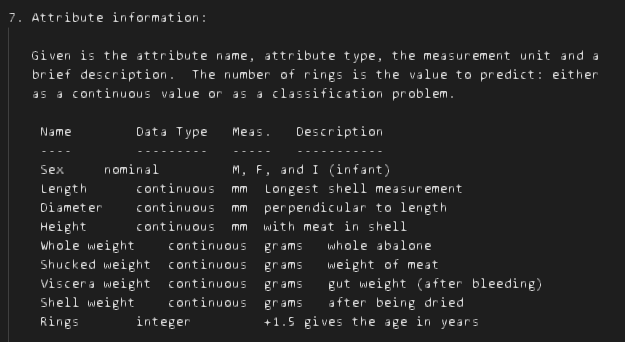

In [340]:
#creamos una lista con los nombres de columnas nuevos y reeemplazamos 
df.columns = ['Sexo','Largo (mm)','Diámetro (mm)','Ancho (mm)','Peso total (grs)', 'Peso de carne (grs)','Peso vísceras (grs)','Peso caparazón (grs)','N° Anillos']

In [341]:
df.head() #comprobamos los cambios

,Sexo,Largo (mm),Diámetro (mm),Ancho (mm),Peso total (grs),Peso de carne (grs),Peso vísceras (grs),Peso caparazón (grs),N° Anillos
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


Listo!

# Tarea
Realizar una regresión lineal y KNN para la tarea de regresión de usar el conjunto de datos de abulón para predecir la edad a partir de sus características. La diferencia es que debe realizar la tarea con y sin división entrenar probar.

## Tarea N° 1
- KNN con división entrenar probar

In [342]:
#mostramos la df que usaremos
df.head()

,Sexo,Largo (mm),Diámetro (mm),Ancho (mm),Peso total (grs),Peso de carne (grs),Peso vísceras (grs),Peso caparazón (grs),N° Anillos
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [343]:
#importamos librerías que necesitaremos 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Division de datos entre las variables independientes y la variable dependiente (vector obetivo)

In [344]:
X_knn_d = df.drop(['Sexo','N° Anillos'],axis =1) #variables dependientes
X_knn_d.head()

,Largo (mm),Diámetro (mm),Ancho (mm),Peso total (grs),Peso de carne (grs),Peso vísceras (grs),Peso caparazón (grs)
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [345]:
y_knn_d = df['N° Anillos'] #variables independientes
y_knn_d.shape

(4177,)

Implementación algoritmo KKNN con division entrenar probar

In [346]:
#importamos librerías para la estandarización de datos
from sklearn.preprocessing import StandardScaler

Aplicamos una estandarización de los datos

In [347]:
X_ent, X_test, y_ent, y_test = train_test_split(X_knn_d,y_knn_d,test_size=0.20,random_state=0)

In [348]:
scaler = StandardScaler()
scaler.fit(X_ent)

X_ent = scaler.transform(X_ent)
X_test = scaler.transform(X_test)

In [349]:
X_ent

array([[-2.56503065, -2.44840291, -1.98531482, ..., -1.49397996,
        -1.53238419, -1.57948802],
       [-2.35801544, -2.24741483, -1.86814789, ..., -1.48063676,
        -1.64128048, -1.56882947],
       [ 1.11984016,  1.1191354 ,  1.17819217, ...,  1.74619561,
         1.05844006,  1.13133839],
       ...,
       [ 0.5816006 ,  0.51617118,  0.24085676, ...,  0.06495145,
         0.10106017, -0.04110292],
       [ 0.83001886,  0.81765329,  0.82669139, ...,  0.38296457,
         0.31885275,  0.84355734],
       [-0.90890894, -0.74000428, -0.93081249, ..., -0.8601776 ,
        -1.03781354, -0.96484455]])

Dividimos los datos en conjuntos de prueba y entrenamiento

Ajustamos los parámetros knn

In [350]:
knn_d = KNeighborsRegressor(n_neighbors=5 , weights = 'distance' , p = 1)

Entrenamos el modelo

In [351]:
knn_d.fit(X_ent,y_ent)

KNeighborsRegressor(p=1, weights='distance')

Calificamos nuestro modelo

In [352]:
knn_d.score(X_test,y_test)

0.4686085976978682

# KNN sin division 

In [353]:
#datos en 'x' y en 'y'
X_knn_nd = df.drop(['Sexo','N° Anillos'],axis =1) #variables dependientes
X_knn_nd.head()

,Largo (mm),Diámetro (mm),Ancho (mm),Peso total (grs),Peso de carne (grs),Peso vísceras (grs),Peso caparazón (grs)
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [354]:
y_knn_nd = df['N° Anillos'] #variables independientes
y_knn_nd.shape

(4177,)

In [355]:
scaler = StandardScaler()
scaler.fit(X_knn_nd)
X_knn_nd = scaler.transform(X_knn_nd)

In [356]:
# procedemos a crear otro modelo 

knn_nd = KNeighborsRegressor() #instanciamos 

In [357]:
knn_nd.fit(X_knn_nd,y_knn_nd) #entrenamos el modelo

KNeighborsRegressor()

In [358]:
#verificamos que puntaje tiene el modelo 
knn_nd.score(X_knn_nd,y_knn_nd)

0.6576046052340013

#Regresion lineal

In [373]:
#importamos librerías 
from sklearn.linear_model import LinearRegression

In [374]:
#datos en 'x' y en 'y'
X_lr_nd = df.drop(['Sexo','N° Anillos'],axis =1) #variables dependientes
X_lr_nd.head()

,Largo (mm),Diámetro (mm),Ancho (mm),Peso total (grs),Peso de carne (grs),Peso vísceras (grs),Peso caparazón (grs)
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [375]:
y_lr_nd = df['N° Anillos'] #variables independientes
y_lr_nd.shape

(4177,)

Observamos que datos hay en la variable sexo

In [376]:
scaler = StandardScaler()
scaler.fit(X_lr_nd)
X_lr_nd = scaler.transform(X_lr_nd)

In [377]:
#Instanciamos
lr_nd_reg = LinearRegression()

In [378]:
lr_nd_reg.fit(X_lr_nd,y_lr_nd) #entrenamos el modelo

LinearRegression()

In [379]:
lr_nd_reg.score(X_lr_nd,y_lr_nd) #puntuamos el modelo

0.5276299399919837

#Regresión lineal con división entrenar probar 

In [380]:
#datos en 'x' y en 'y'
X_lr_d = df.drop(['Sexo','N° Anillos'],axis =1) #variables dependientes
X_lr_d.head()

,Largo (mm),Diámetro (mm),Ancho (mm),Peso total (grs),Peso de carne (grs),Peso vísceras (grs),Peso caparazón (grs)
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [381]:
y_lr_d = df['N° Anillos'] #variables independientes
y_lr_d.shape

(4177,)

In [382]:
X_ent, X_test, y_ent, y_test = train_test_split(X_lr_d,y_lr_d,test_size=0.20,random_state=0)

In [383]:
scaler = StandardScaler()
scaler.fit(X_ent)

X_ent = scaler.transform(X_ent)
X_test = scaler.transform(X_test)

In [384]:
#instanciamos para crear otro modelo 
lr_reg2 = LinearRegression()

In [385]:
lr_reg2.fit(X_ent,y_ent) #entrenamos el modelo 

LinearRegression()

In [386]:
lr_reg2.score(X_test,y_test) #puntuamos el modelo

0.5144602488333944

#Preguntas para pensar y responder

Una vez que hayas completado la tarea, responde las siguientes preguntas:

1. ¿Cuál de KNN o regresión lineal pareció un mejor modelo cuando no usaste la división entrenar probar?
  - El modelo de **KNN sin división** fue el mejor ya que nos dió un R2 de 0.65, el valor más alto de todos los modelos.
2. ¿Cuál de KNN o regresión lineal pareció un mejor modelo cuando usaste la división entrenar probar?
  -  **EL modelo de regresión lineal fue un mejor modelo considerando su R2** (lr con división =0.51 / knn con division 0.46), pero por la teoría, el modelo de regresión lineal va a funcionar mejor al querer predecir valores continuos; ya que el modelo de knn funciona mejor con valores categóricas
3. ¿Hubo alguna ventaja en la regresión lineal en términos de la cantidad de código que tenías que escribir?
  - **Ninguna**, ya que son los mismo pasos a seguir en cualquiera de los dos casos, comparándolo con los modelos de knn con división y knn sin división.
4. ¿Hay alguna forma de mostrarle a alguien cuál de los dos modelos fue más efectivo?
-  **Si, podríamos mostrarle la métrica de r2 de cada modelo**, por ejemplo: En el modelo de knn sin división nos mostró un r2 de 0.65, eso significa que si se presentan nuevos datos, el modelo va a predecir la edad del abulón un 65% de las veces; por el contrario, si eligieramos un modelo diferente, tomando como ejemplo el modelo de regresión lineal con división de prueba (0.51), el modelo  va acertar un 50% de las veces, lo mismo que tirar una moneda al aire.
5. ¿Crees que podrías haber mejorado KNN para mejorar la eficacia del modelo?
- **Si y no**; no ya que el modelo por sí mismo no es muy bueno al predecir valores continuos,además de no trabajar muy bien con muchas variables. Pero si, ya que se pueden 'jugar' con hiperparámetros que se pueden ajustar al modelo sabiendo características que se consiguen fuera de la base de datos (investigación).

*Códigos inspirados de la plataforma Coding Dojo*